In [11]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('bank-full.csv').dropna()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,dayspassed,previouscontact,poutcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Cleaning and Balancing


In [13]:
#poutcome and contact are mostly unknown, hence we drop these columns
#Will consider dropping default column due to lack of yes/no values

df = df.drop(columns = ['contact','poutcome'])
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


In [14]:
mapping = {
    'no':0, 
    'yes':1,
    'admin.':1, 
    'unemployed':2, 
    'management':3, 
    'housemaid':4, 
    'entrepreneur':5,
    'student':6, 
    'blue-collar':7, 
    'self-employed':8, 
    'retired':9,
    'technician':10,
    'services':11,
    'married':1,
    'divorced':2,
    'single':3,
    'primary':1,
    'secondary':2,
    'tertiary':3,
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

df['job'] = df['job'].map(mapping)
df['marital'] = df['marital'].map(mapping)
df['education'] = df['education'].map(mapping)
df['housing'] = df['housing'].map(mapping)
df['loan'] = df['loan'].map(mapping)
df['default'] = df['default'].map(mapping)
df['month'] = df['month'].map(mapping)
df['outcome'] = df['outcome'].map(mapping)

In [15]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
0,58,3.0,1,3.0,0,2143,1,0,5,5,261,1,-1,0,0
1,44,10.0,3,2.0,0,29,1,0,5,5,151,1,-1,0,0
2,33,5.0,1,2.0,0,2,1,1,5,5,76,1,-1,0,0
3,47,7.0,1,NaN,0,1506,1,0,5,5,92,1,-1,0,0
4,33,NaN,3,NaN,0,1,0,0,5,5,198,1,-1,0,0
5,35,3.0,1,3.0,0,231,1,0,5,5,139,1,-1,0,0
6,28,3.0,3,3.0,0,447,1,1,5,5,217,1,-1,0,0
7,42,5.0,2,3.0,1,2,1,0,5,5,380,1,-1,0,0
8,58,9.0,1,1.0,0,121,1,0,5,5,50,1,-1,0,0
9,43,10.0,3,2.0,0,593,1,0,5,5,55,1,-1,0,0


In [31]:
df = df.dropna()

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
0,58,3.0,1,3.0,0,2143,1,0,5,5,261,1,-1,0,0
1,44,10.0,3,2.0,0,29,1,0,5,5,151,1,-1,0,0
2,33,5.0,1,2.0,0,2,1,1,5,5,76,1,-1,0,0
5,35,3.0,1,3.0,0,231,1,0,5,5,139,1,-1,0,0
6,28,3.0,3,3.0,0,447,1,1,5,5,217,1,-1,0,0
7,42,5.0,2,3.0,1,2,1,0,5,5,380,1,-1,0,0
8,58,9.0,1,1.0,0,121,1,0,5,5,50,1,-1,0,0
9,43,10.0,3,2.0,0,593,1,0,5,5,55,1,-1,0,0
10,41,1.0,2,2.0,0,270,1,0,5,5,222,1,-1,0,0
11,29,1.0,3,2.0,0,390,1,0,5,5,137,1,-1,0,0


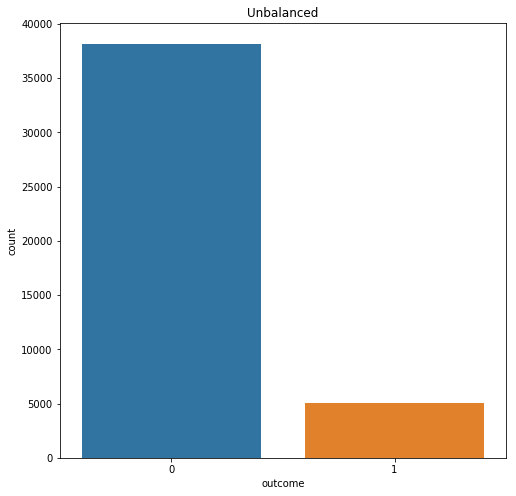

In [33]:
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.countplot('outcome', data=df)

plt.title('Unbalanced')

plt.show()

The chart shows our data is unbalanced (No(0) < Yes(1))

In [34]:
df[drop_df == 'NaN'].count()

C:\Users\Antonio\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
dayspassed         0
previouscontact    0
outcome            0
dtype: int64

In [35]:
df.outcome.value_counts()

0    38172
1     5021
Name: outcome, dtype: int64

In [37]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# # Put all the 'yes' class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['outcome'] == 1]

# #Randomly select 5021 observations from the 'no' class (majority class)
no_df = shuffled_df.loc[shuffled_df['outcome'] == 0].sample(n=5021,random_state=42)

# # Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

#plot the dataset after the undersampling
# plt.figure(figsize=(8, 8))
# sns.countplot('Class', data=normalized_df)
# plt.title('Balanced Classes')
# plt.show()

In [38]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 41787 to 12428
Data columns (total 15 columns):
age                10042 non-null int64
job                10042 non-null float64
marital            10042 non-null int64
education          10042 non-null float64
default            10042 non-null int64
balance            10042 non-null int64
housing            10042 non-null int64
loan               10042 non-null int64
day                10042 non-null int64
month              10042 non-null int64
duration           10042 non-null int64
campaign           10042 non-null int64
dayspassed         10042 non-null int64
previouscontact    10042 non-null int64
outcome            10042 non-null int64
dtypes: float64(2), int64(13)
memory usage: 1.2 MB


In [39]:
normalized_df.outcome.value_counts()

1    5021
0    5021
Name: outcome, dtype: int64

In [40]:
#for column 'default', the category 'no' is overwhelmingly large. Unlikely to 
#use this feature for predicting our model
normalized_df.default.value_counts()

0    9896
1     146
Name: default, dtype: int64

In [41]:
normalized_df[normalized_df == 'unknown'].count()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
dayspassed         0
previouscontact    0
outcome            0
dtype: int64

In [42]:
normalized_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
41787,35,10.0,3,3.0,0,670,0,0,13,10,301,2,-1,0,1
40757,59,9.0,2,3.0,0,3444,0,0,10,8,252,1,185,2,1
36829,47,7.0,1,2.0,0,802,1,1,12,5,289,2,-1,0,1
44098,70,9.0,1,1.0,0,2795,0,0,8,7,480,1,181,2,1
22465,46,11.0,1,2.0,0,273,0,0,22,8,565,2,-1,0,1


In [43]:
normalized_df[normalized_df == 'NaN'].count()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
dayspassed         0
previouscontact    0
outcome            0
dtype: int64

In [44]:
normalized_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
41787,35,10.0,3,3.0,0,670,0,0,13,10,301,2,-1,0,1
40757,59,9.0,2,3.0,0,3444,0,0,10,8,252,1,185,2,1
36829,47,7.0,1,2.0,0,802,1,1,12,5,289,2,-1,0,1
44098,70,9.0,1,1.0,0,2795,0,0,8,7,480,1,181,2,1
22465,46,11.0,1,2.0,0,273,0,0,22,8,565,2,-1,0,1


In [730]:
normalized_df.info

<bound method DataFrame.info of        age   job  marital  education  default  balance  housing  loan  day  \
41787   35  10.0        3        3.0        0      670        0     0   13   
40757   59   9.0        2        3.0        0     3444        0     0   10   
36829   47   7.0        1        2.0        0      802        1     1   12   
44098   70   9.0        1        1.0        0     2795        0     0    8   
22465   46  11.0        1        2.0        0      273        0     0   22   
20850   43   3.0        1        3.0        0     2383        0     0   13   
23231   33   3.0        3        3.0        0     7084        0     0   27   
26490   45   8.0        1        2.0        0        7        0     0   20   
39702   44   3.0        1        3.0        0     7818        0     0   27   
20603   49   7.0        1        1.0        0      128        0     0   12   
19327   32  10.0        1        2.0        0      560        0     0    6   
37357   35   3.0        3       

# Feature Engineering

In [576]:
#correlation between each features
normalized_df.corr()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
age,1.000000,0.088241,-0.418144,-0.188968,-0.024002,0.118012,-0.177010,-0.030758,-0.011730,0.069543,-0.000771,-0.013911,0.003996,0.013811,0.038132
job,0.088241,1.000000,-0.038692,-0.234777,0.002316,-0.020951,0.038925,0.027679,0.002217,-0.012209,0.020142,0.008746,-0.029259,-0.032168,-0.042770
marital,-0.418144,-0.038692,1.000000,0.181805,0.019785,-0.030783,-0.040811,-0.048920,0.015081,-0.059930,0.022404,-0.037919,0.018766,0.002857,0.096742
education,-0.188968,-0.234777,0.181805,1.000000,-0.015186,0.068143,-0.100168,-0.048317,0.001124,0.037688,-0.008658,-0.017630,0.029242,0.044346,0.109781
default,-0.024002,0.002316,0.019785,-0.015186,1.000000,-0.057957,0.012111,0.081583,0.002950,0.003515,-0.008346,-0.005211,-0.029149,-0.024203,-0.041597
balance,0.118012,-0.020951,-0.030783,0.068143,-0.057957,1.000000,-0.086280,-0.090222,0.007526,0.071006,0.018026,-0.026391,0.023313,0.031850,0.091502
housing,-0.177010,0.038925,-0.040811,-0.100168,0.012111,-0.086280,1.000000,0.073717,-0.013878,-0.133346,0.034851,0.012341,0.070566,0.006859,-0.208933
loan,-0.030758,0.027679,-0.048920,-0.048317,0.081583,-0.090222,0.073717,1.000000,0.020073,0.003658,0.005422,0.019355,-0.046286,-0.035409,-0.127282
day,-0.011730,0.002217,0.015081,0.001124,0.002950,0.007526,-0.013878,0.020073,1.000000,0.062251,-0.003501,0.128726,-0.060820,-0.055240,-0.036681
month,0.069543,-0.012209,-0.059930,0.037688,0.003515,0.071006,-0.133346,0.003658,0.062251,1.000000,0.012574,0.042427,-0.041533,0.010870,0.030284


In [577]:
normalized_df.shape
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 41787 to 12428
Data columns (total 15 columns):
age                10042 non-null int64
job                10042 non-null float64
marital            10042 non-null int64
education          10042 non-null float64
default            10042 non-null int64
balance            10042 non-null int64
housing            10042 non-null int64
loan               10042 non-null int64
day                10042 non-null int64
month              10042 non-null int64
duration           10042 non-null int64
campaign           10042 non-null int64
dayspassed         10042 non-null int64
previouscontact    10042 non-null int64
outcome            10042 non-null int64
dtypes: float64(2), int64(13)
memory usage: 1.2 MB


In [578]:
#counts the total buy deposit = 1 in column marital( 1 = married, 2 = divorced, 3 = single)
buy = normalized_df[normalized_df['outcome']==1]['marital'].value_counts()
#counts the total buy deposit = 1 in column marital( 1 = married, 2 = divorced, 3 = single)
nobuy = normalized_df[normalized_df['outcome']==0]['marital'].value_counts()
df = pd.DataFrame([buy,nobuy])
df.index = ['Buy', 'No Buy']
df

,1,3,2
Buy,2603,1820,598
No Buy,3058,1393,570


In [579]:
def bar_chart(feature):
    buy = normalized_df[normalized_df['outcome']==1][feature].value_counts()
    nobuy = normalized_df[normalized_df['outcome']==0][feature].value_counts()
    df = pd.DataFrame([buy,nobuy])
    df.index = ['Buy', 'No Buy']
    print(df)
    df.plot(kind='barh',stacked=True, figsize=(10,5))

           1     3    2
Buy     2603  1820  598
No Buy  3058  1393  570


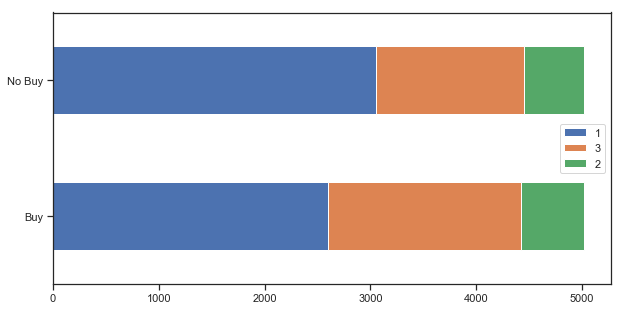

In [580]:
bar_chart('marital')

Category 1 : married
Category 2 : divorced
Category 3 : single

We can see from the chart that individual with "married" status are likely to buy the deposit
compared to two other categories.
Reasoning : Because married people has more money compared to two other categories

           0    1
Buy     4548  473
No Buy  4107  914


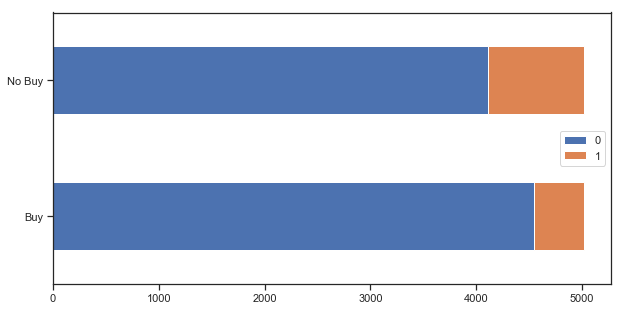

In [581]:
bar_chart('loan')

Category 0 : no loan
Category 1 : loan

From the chart above we can see there are more people with no loan(category : 0) buy bank term deposit
compared to those who has loan(category : 1)

Reasoning : people with no loan has more funds, hence they have more financial freedom to buy other financial instruments


           0     1
Buy     3147  1874
No Buy  2099  2922


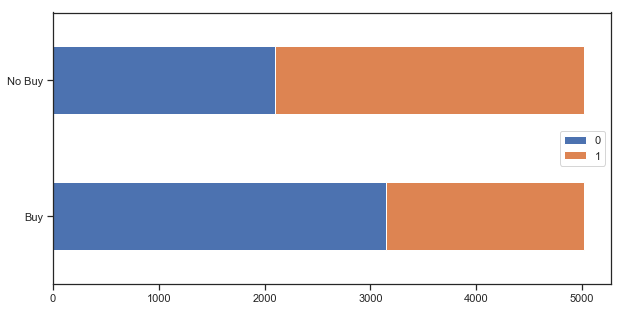

In [582]:
bar_chart('housing')

Category 0 : no housing loan, Category 1 : housing loan 
        
People who has no housing loan buy the bank term deposit since they have more fund

         2.0   3.0  1.0
Buy     2441  1992  588
No Buy  2721  1485  815


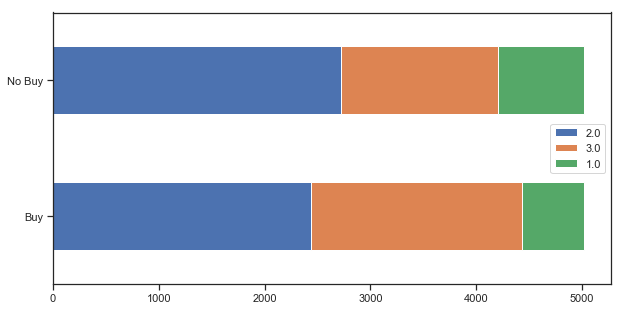

In [583]:
bar_chart('education')

Category 1 : primary
Category 2 : secondary
Category 3 : tertiary

Conclusion : Majority who buy the bank fixed term deposit are people with secondary and tertiary background
Reasoning : Because people with secondary and tertiary background has earned more salary than people with only primary background

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B3D655B38>,
      dtype=object)

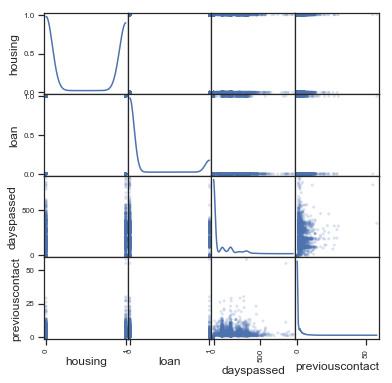

In [527]:
from pandas.plotting import scatter_matrix

scatter_matrix(normalized_df.iloc[:,[6,7,12,13]], alpha=0.2, figsize=(6,6), diagonal='kde')

C:\Users\Antonio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Antonio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


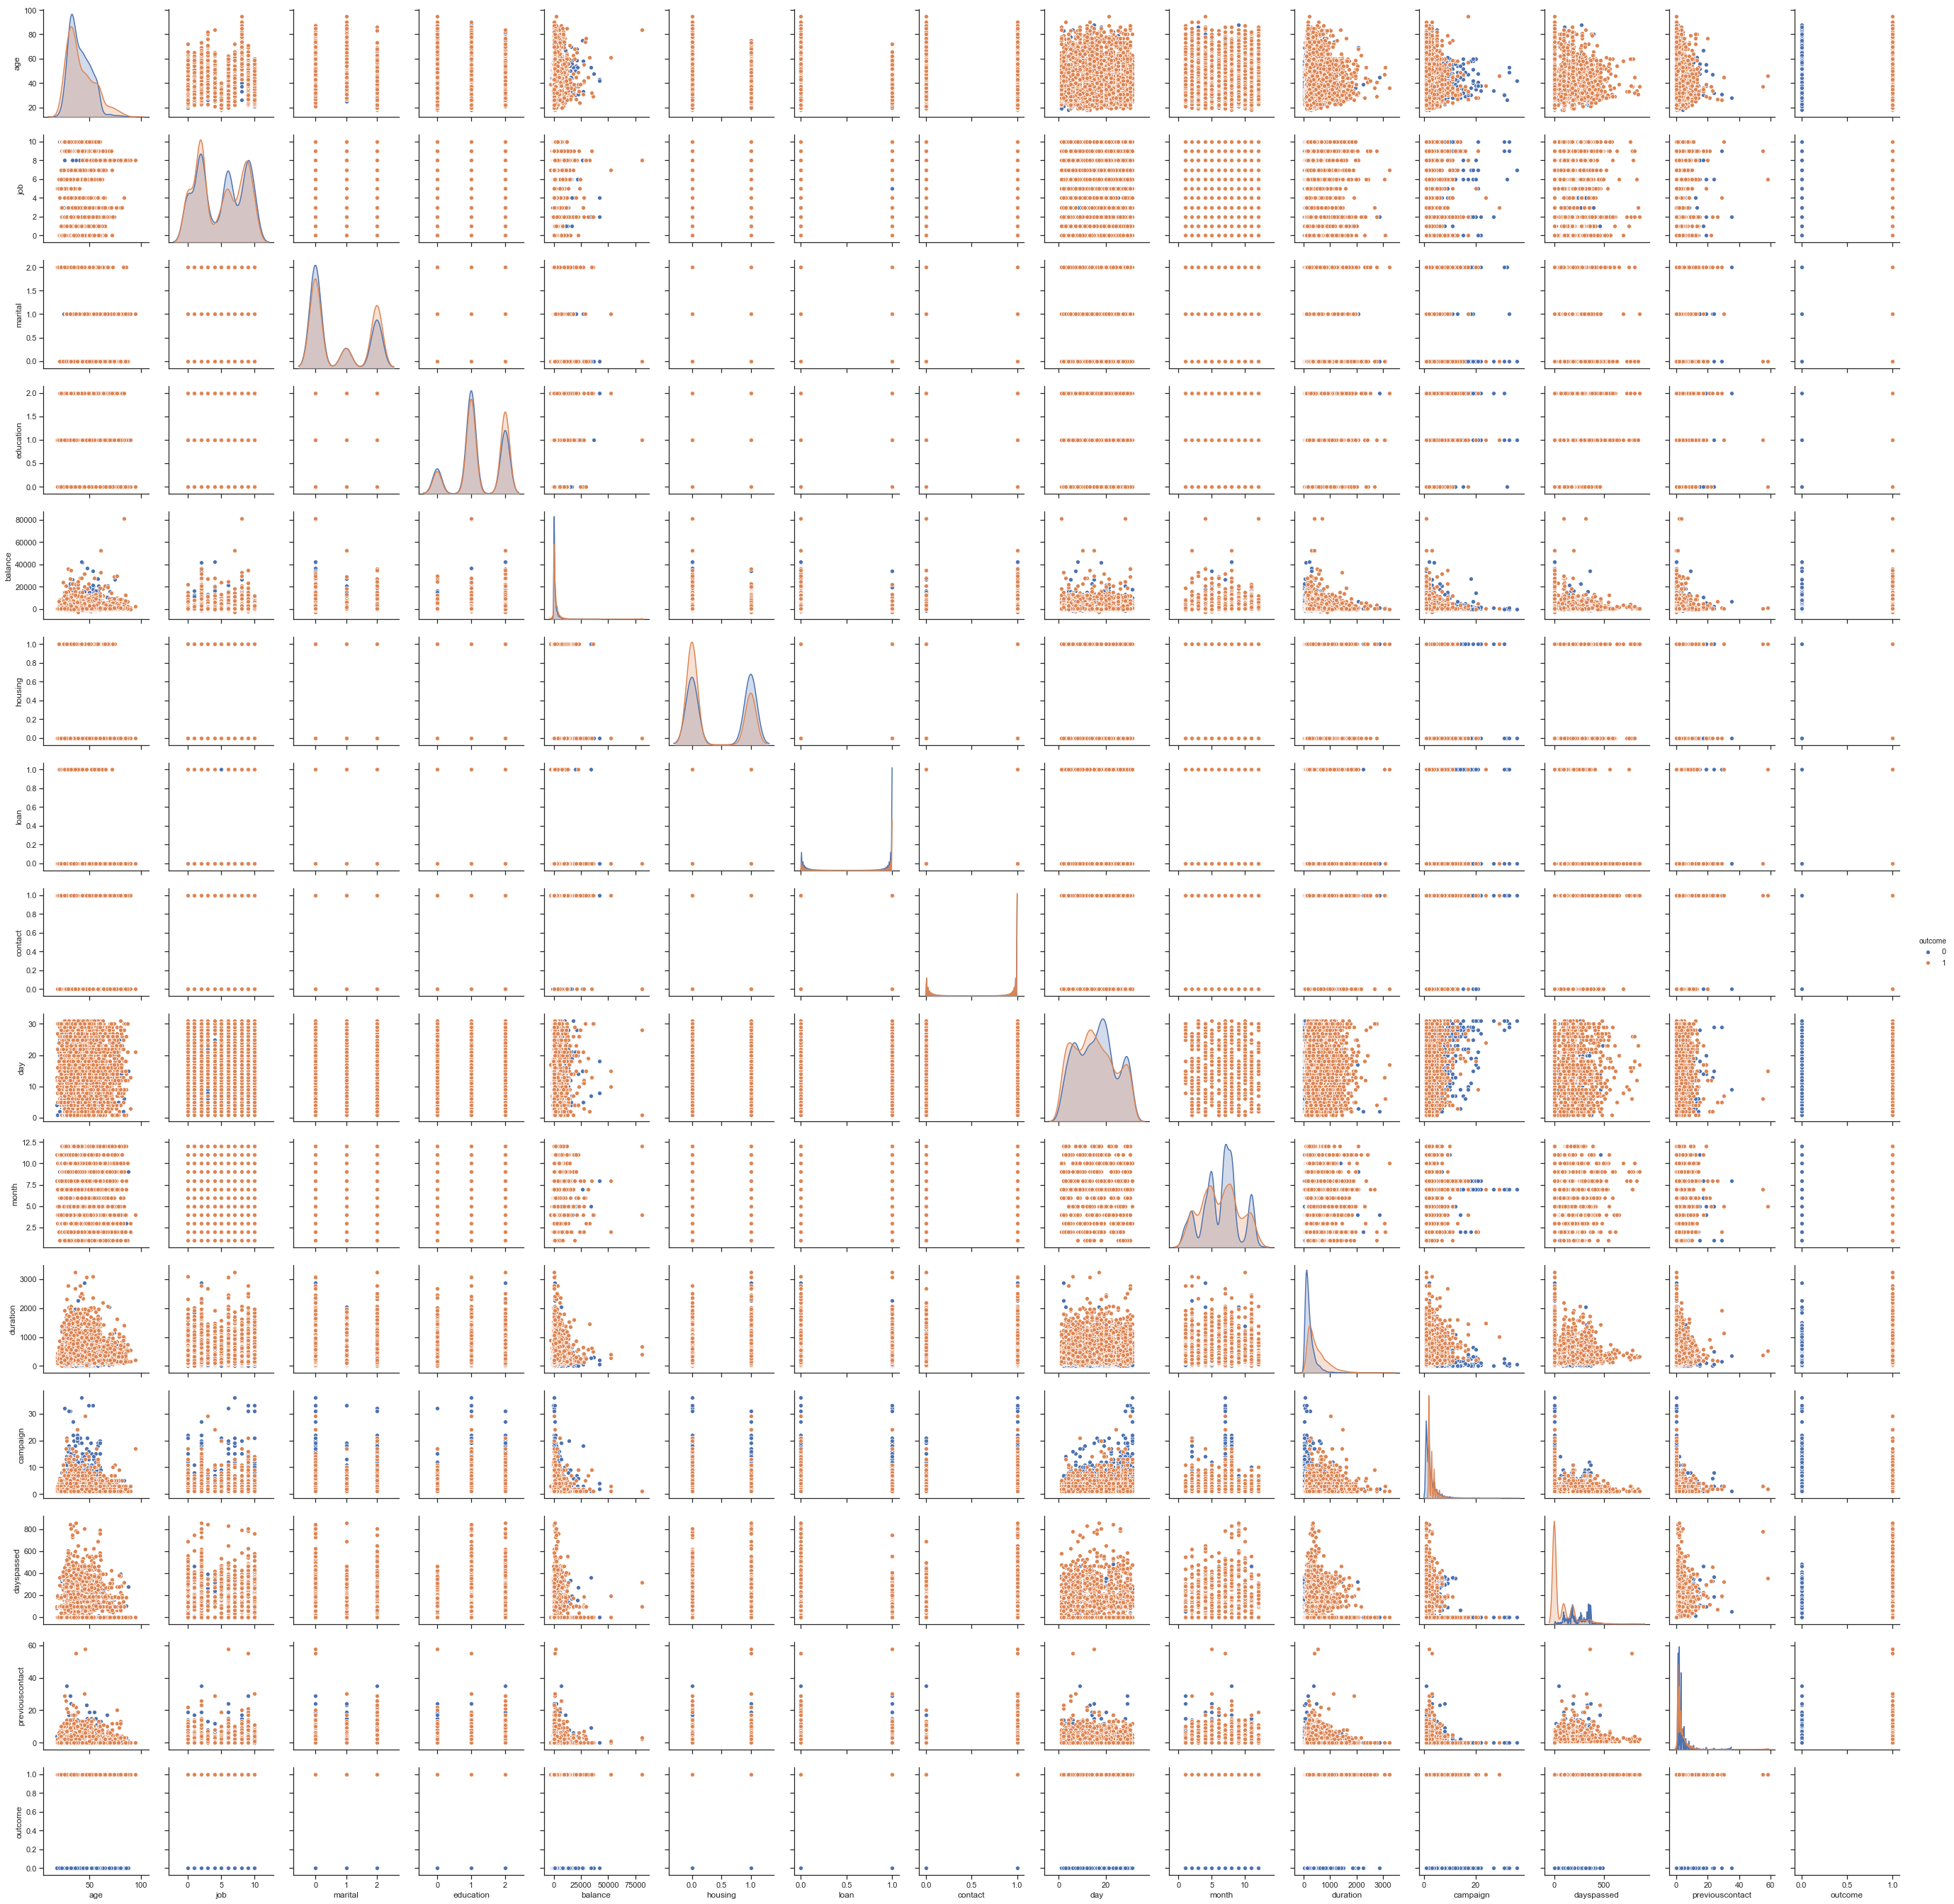

In [119]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(clean_df, hue="outcome")

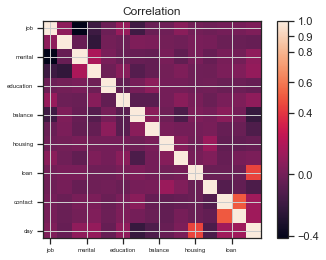

In [584]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation')
labels=['age','job','marital','education','balance','housing','loan','contact','day','month','duration','campaign','dayspassed','previouscontact','outcome']
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

# Train the raw dataset(before balancing the outcome)



In [46]:
from sklearn.model_selection import train_test_split

#We choose features housing and loan 
X = df.iloc[:,[6,7]]
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [47]:
print(X_train.head())

       housing  loan
33601        1     1
1424         1     0
14798        1     0
499          1     0
8131         1     0


In [48]:
print(X_test.head())

       housing  loan
13082        1     1
4244         0     0
2647         1     0
25882        1     1
24879        1     0


In [49]:
print(y_train.head())

33601    0
1424     0
14798    0
499      0
8131     0
Name: outcome, dtype: int64


In [50]:
print(y_test.head())

13082    0
4244     0
2647     0
25882    1
24879    0
Name: outcome, dtype: int64


In [51]:
normalized_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,dayspassed,previouscontact,outcome
41787,35,10.0,3,3.0,0,670,0,0,13,10,301,2,-1,0,1
40757,59,9.0,2,3.0,0,3444,0,0,10,8,252,1,185,2,1
36829,47,7.0,1,2.0,0,802,1,1,12,5,289,2,-1,0,1
44098,70,9.0,1,1.0,0,2795,0,0,8,7,480,1,181,2,1
22465,46,11.0,1,2.0,0,273,0,0,22,8,565,2,-1,0,1


# K-N Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_array = np.arange(1,21,2)
print(k_array)

for k in k_array:
    knn_model = KNeighborsClassifier(n_neighbors = k) 
    knn_model.fit(X_train, y_train) #train our model to the data set
    y_pred = knn_model.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    print(k)
    print("The accuracy score is :" + str(ac))


[ 1  3  5  7  9 11 13 15 17 19]
1
The accuracy score is :0.8856349114480843
3
The accuracy score is :0.8856349114480843
5
The accuracy score is :0.8856349114480843
7
The accuracy score is :0.8856349114480843
9
The accuracy score is :0.8856349114480843
11
The accuracy score is :0.8856349114480843
13
The accuracy score is :0.8856349114480843
15
The accuracy score is :0.8856349114480843
17
The accuracy score is :0.8856349114480843
19
The accuracy score is :0.8856349114480843


In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7651    0]
 [ 988    0]]


In [592]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Support Vector Machine

In [593]:
from sklearn.svm import SVC

svClassifier = SVC(kernel='linear')
svClassifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [594]:
y_pred = svClassifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [595]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6132404181184669

# PCA

In [719]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
# features = ['balance','duration','day']
x = normalized_df.iloc[:, 0:14].values
# Separating out the target
y = normalized_df.loc[:,['outcome']].values
#standardizing the features
x_scaled = StandardScaler().fit_transform(x)


In [723]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 2)
principalComponents = pca.fit_transform(x_scaled)
principalDF = pd.DataFrame(data = principalComponents, columns =['principal component 1', 'principal component 2'])

principalDF.head()

,principal component 1,principal component 2
0,0.587183,-0.968646
1,0.252027,1.835550
2,-1.150284,-0.246126
3,-1.877700,2.903479
4,-1.586083,0.071069


In [724]:
#change into numpy array
combined_arr = np.concatenate((principalDF.values,normalized_df[['outcome']]), axis=1 )

#change back into dataframe
finalDf = pd.DataFrame(combined_arr, columns=['principal component 1','principal component 2','outcome'])


print(finalDf.shape)
finalDf.head()

(10042, 3)


,principal component 1,principal component 2,outcome
0,0.587183,-0.968646,1.0
1,0.252027,1.835550,1.0
2,-1.150284,-0.246126,1.0
3,-1.877700,2.903479,1.0
4,-1.586083,0.071069,1.0


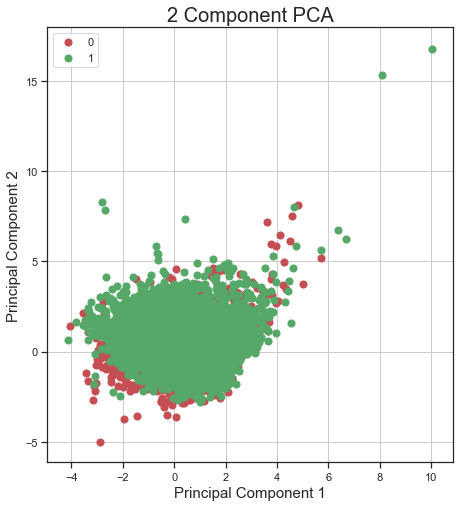

In [725]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['outcome'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [641]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.33950217 0.33414976]
0.6736519273210153


# K-Means Clustering

In [695]:
# x = normalized_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

x = normalized_df.iloc[:,0:14].values
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[ 35.  10.   3. ...   2.  -1.   0.]
 [ 59.   9.   2. ...   1. 185.   2.]
 [ 47.   7.   1. ...   2.  -1.   0.]
 ...
 [ 49.   4.   1. ...   1.  -1.   0.]
 [ 56.   3.   1. ...   2. 188.   4.]
 [ 38.   7.   3. ...   1.  -1.   0.]]


In [698]:
#train the data 

km2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x)
y_kmeans = km2.fit_predict(x)

In [699]:
type(y_kmeans)
y_kmeans.shape

(10042,)

In [700]:
y_kmeans == 3

array([False,  True, False, ..., False,  True, False])

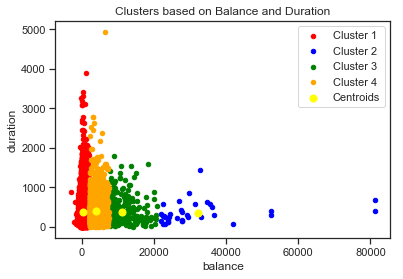

In [704]:
#Visualising the clusters by selecting only column 5 and 10 (balance and duration)
plt.scatter(x[y_kmeans == 0, 5], x[y_kmeans == 0, 10], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 5], x[y_kmeans == 1, 10], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 5], x[y_kmeans == 2, 10], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 5], x[y_kmeans == 3, 10], s = 20, c = 'orange', label = 'Cluster 4')

#Plotting the centroids of the clusters
#how to get the centroid : using cluster_centers_
plt.scatter(km2.cluster_centers_[:, 5], km2.cluster_centers_[:,10], s = 50, c = 'yellow', label = 'Centroids')

plt.title('Clusters based on Balance and Duration')
plt.xlabel(normalized_df.columns[5])
plt.ylabel(normalized_df.columns[10])

plt.legend()
plt.show()

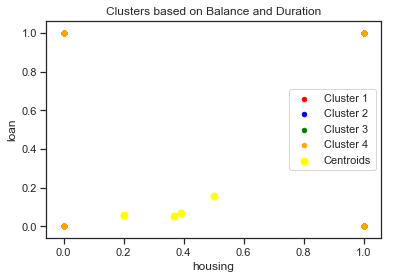

In [705]:
#Visualising the clusters by selecting only column 6 and 7 (housing and loan)
plt.scatter(x[y_kmeans == 0, 6], x[y_kmeans == 0, 7], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 6], x[y_kmeans == 1, 7], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 6], x[y_kmeans == 2, 7], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 6], x[y_kmeans == 3, 7], s = 20, c = 'orange', label = 'Cluster 4')

#Plotting the centroids of the clusters
#how to get the centroid : using cluster_centers_
plt.scatter(km2.cluster_centers_[:, 6], km2.cluster_centers_[:,7], s = 50, c = 'yellow', label = 'Centroids')

plt.title('Clusters based on Balance and Duration')
plt.xlabel(normalized_df.columns[6])
plt.ylabel(normalized_df.columns[7])

plt.legend()
plt.show()

[96635291354.40958, 46738025198.23403, 26985292846.616035, 17662986741.623455, 11574056408.885937, 8388094934.720781, 6768892935.776336, 5506426893.578141, 4668175796.934534, 3866567781.6049027]


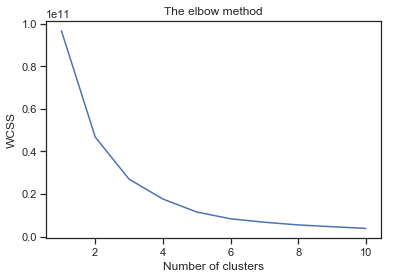

In [626]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()